In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
branchingfractions_dtf = pd.read_csv('BranchingFactors.dat', delimiter='\t')


branchingfractions = np.squeeze(np.array(list(branchingfractions_dtf.iloc)))[1:]
branchingfractions[0]

'   10.000000000000000        1.0000000000000000E-003   0.0000000000000000        1.0378850333402099E-039   0.0000000000000000        4.4365241407128316E-035   0.0000000000000000        1.1961342122771007E-032   1.0731768960356099E-037   4.2927058455958298E-037   3.9703060050698629E-032   1.2648359410883450E-034   0.0000000000000000        1.8907702685825178E-031   0.0000000000000000        0.0000000000000000        0.0000000000000000        8.4828835412886705E-034   0.0000000000000000        0.0000000000000000        0.0000000000000000     '

In [46]:
variables = [channel.strip() for channel in branchingfractions_dtf.columns[0].split(' | ')]
variablesdict = {idx:channel.replace(' + ','').replace('bar','').replace('anti-','') for idx, channel in enumerate(variables)}
list(variablesdict.values())

['mS [GeV]',
 'lahS',
 'nuenue',
 'e+e-',
 'numunumu',
 'mu+mu-',
 'nutaunutau',
 'tau+tau-',
 'uu',
 'dd',
 'cc',
 'ss',
 'tt',
 'bb',
 'gammagamma',
 'W+W-',
 'ZZ',
 'gg',
 'HH',
 'Zgamma',
 'hadrons (below confinement scale)']

In [3]:

splitBFs = [np.array(unsplitBF.split(' ')) for unsplitBF in branchingfractions]
splitBFs = np.array([splitBF[np.where(splitBF)] for splitBF in splitBFs]).astype(float)
np.sum(splitBFs[:,2:],axis=1).shape

(202709,)

In [4]:
channel_params = splitBFs[:,[0,1,15]]
channel_params[:,2] = channel_params[:,2]/(np.sum(splitBFs[:,2:],axis=1))

In [5]:
masses = np.unique(channel_params[:,0])
lambdas = np.unique(channel_params[:,1])

massgrid, lambdagrid = np.meshgrid(masses, lambdas, indexing='ij')
massgrid.max()/1e3

1023.24596303831

In [34]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (massgrid, lambdagrid))

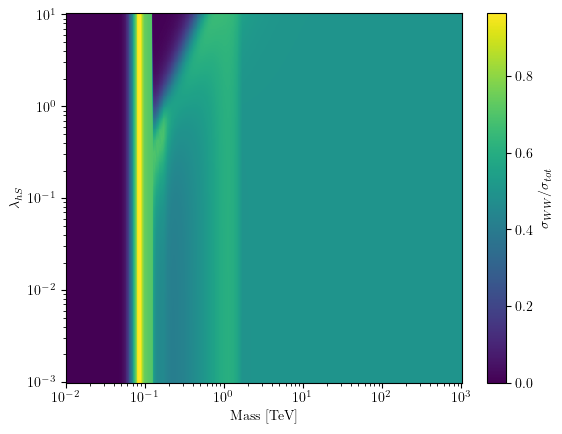

In [86]:
plt.figure()
plt.pcolormesh(masses/1000, lambdas, zi.T)#, norm=LogNorm(vmin=1e-2))
plt.colorbar(label=r'$\sigma_{WW}/\sigma_{tot}$')
plt.loglog()
plt.xlabel("Mass [TeV]")
plt.ylabel(r"$\lambda_{hS}$")
plt.show()

[]

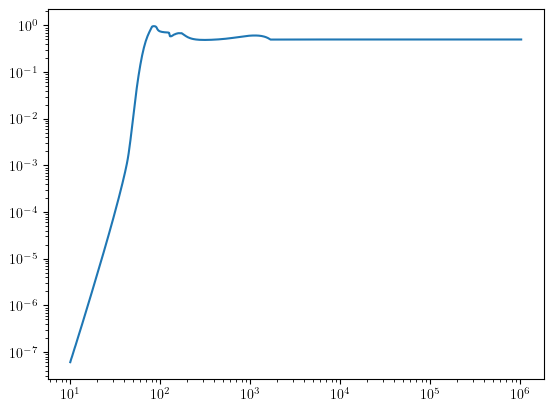

In [103]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (masses, masses*0+0.5))
zi = np.squeeze(zi)

plt.figure()
plt.plot(masses, zi)
plt.loglog()

In [40]:
splitBFs.shape

(202709, 21)

In [47]:
df = pd.DataFrame(splitBFs, columns=list(variablesdict.values()))
df.to_csv('darkSUSY_BFs_cleaned.csv', index=True, header=True, sep=' ')

In [57]:
df.head()

,mS [GeV],lahS,nuenue,e+e-,numunumu,mu+mu-,nutaunutau,tau+tau-,uu,dd,...,ss,tt,bb,gammagamma,W+W-,ZZ,gg,HH,Zgamma,hadrons (below confinement scale)
0,10.000000,0.001,0.0,1.037885e-39,0.0,4.436524e-35,0.0,1.196134e-32,1.073177e-37,4.292706e-37,...,1.264836e-34,0.0,1.890770e-31,0.000000e+00,0.000000e+00,0.000000e+00,8.482884e-34,0.0,0.0,0.0
1,10.232460,0.001,0.0,1.040444e-39,0.0,4.382485e-35,0.0,1.208590e-32,1.075823e-37,4.303291e-37,...,6.882296e-35,0.0,1.594706e-31,8.700796e-36,1.312915e-38,4.316522e-39,5.070962e-33,0.0,0.0,0.0
2,10.470323,0.001,0.0,1.043134e-39,0.0,4.393324e-35,0.0,1.214099e-32,1.078604e-37,4.314415e-37,...,6.854424e-35,0.0,1.602084e-31,9.128516e-36,1.498366e-38,4.924370e-39,4.919986e-33,0.0,0.0,0.0
3,10.713716,0.001,0.0,1.045961e-39,0.0,4.404241e-35,0.0,1.219491e-32,1.081528e-37,4.326110e-37,...,6.826209e-35,0.0,1.607823e-31,9.599554e-36,1.743458e-38,5.726836e-39,4.775393e-33,0.0,0.0,0.0
4,10.962766,0.001,0.0,1.048934e-39,0.0,4.415717e-35,0.0,1.224982e-32,1.084602e-37,4.338405e-37,...,6.799464e-35,0.0,1.613512e-31,1.007108e-35,1.993359e-38,6.544961e-39,4.634583e-33,0.0,0.0,0.0


In [79]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [80]:
massvalues = np.unique(df.iloc[:,0])
lambdavalues = np.unique(df.iloc[:,1])

In [97]:
massvalues[0], channel_params[0,0]

(10.0, 10.0)

In [81]:
%%timeit
bfinterpolator(1.0, 0.1)

12.1 µs ± 83.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


2 nuenue
3 e+e-
4 numunumu
5 mu+mu-
6 nutaunutau
7 tau+tau-
8 uu
9 dd
10 cc
11 ss
12 tt
13 bb
14 gammagamma
15 W+W-
16 ZZ
17 gg
18 HH
19 Zgamma
20 hadrons (below confinement scale)


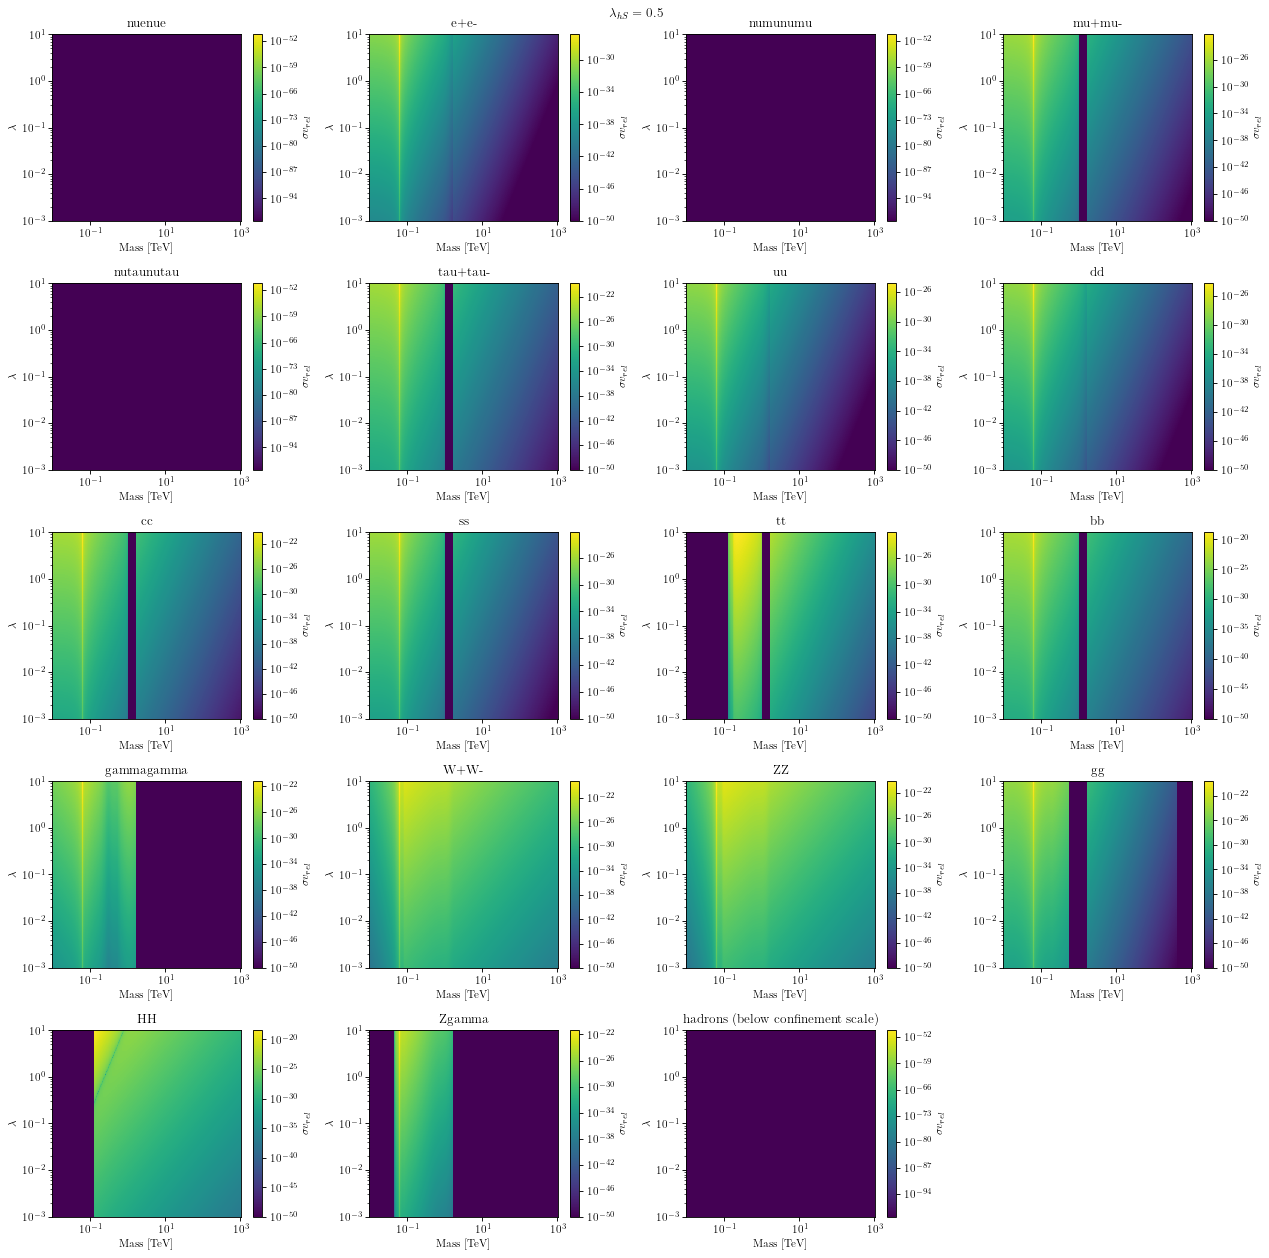

In [121]:
plt.figure(figsize=(16,16), dpi=80)
plt.suptitle(r"$\lambda_{hS}=0.5$")
massesabove0p1TeV = massvalues[massvalues>100]/1000
for idx, channel_name in enumerate(list(variablesdict.values())[2:]):
    print(idx+2, channel_name)
    plt.subplot(5,4, idx+1)
    plt.title(f"{channel_name}")
    plt.pcolormesh(massvalues/1000, lambdavalues, 
                   splitBFs[:,idx+2].reshape(lambdavalues.shape[0], massvalues.shape[0])+1e-100,
                   norm=LogNorm(vmin=1e-50))
    plt.xlabel('Mass [TeV]')
    plt.ylabel('$\lambda$')
    plt.loglog()
    plt.colorbar(label=r'$\sigma v_{rel}$')
plt.tight_layout()
plt.show()

In [100]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [101]:
bfinterpolator(1.0, 0.5)

array(nan)

In [104]:
splitBFs[:,15][np.abs(channel_params[:,0]-1.0).argmin()]

0.0

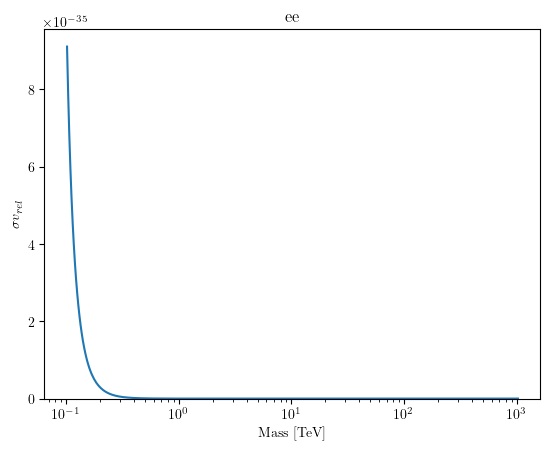

In [109]:
plt.title(f"ee")
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,3])
plt.plot(massesabove0p1TeV, bfinterpolator(massesabove0p1TeV, 0.5))
plt.xlabel('Mass [TeV]')
plt.ylabel('$\sigma v_{rel}$')
plt.ylim([1e-50,None])
plt.xscale('log')